In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# fredpy


Federal Reserve Economic Data (FRED) is a repository of economic data maintained by the Federal Reserve Bank of St Louis. fredpy is a Python module for easily retrieving and manipulating data series from FRED. This notebook contains a few examples to show how to get started with fredpy. For more detailed information and examples, check out the fredpy documentation: https://www.briancjenkins.com/fredpy/docs/build/html/index.html.

## Getting Started

To use fredpy, you must install it from PyPI by running the following command in the Terminal (Mac) or the Anaconda Prompt (PC):

    pip install fredpy
    
Next, apply for an API key for FRED here: https://research.stlouisfed.org/docs/api/api_key.html. The API key is a 32 character string that is required for making requests from FRED through its API.


## Usage

First, import the module.

In [2]:
import fredpy as fp

Save your API key in the `fp` namespace by either setting the `fp.api_key` directly:

In [3]:
fp.api_key = '################################'

or by reading from a text file containing only the text of the API key in the first line:

In [4]:
fp.api_key = fp.load_api_key('fred_api_key.txt')

If fred_api_key.txt is not in the same directory as your program file, then you must supply the full path of the file. Next, as a quick example, lets use fredpy to download unemployment rate data for the US. The series ID for the unemployment rate is `UNRATE`. Use the `fp.series()` function to create a variable called `unemployment` that stores the downloaded unemployment rate data.

In [5]:
unemployment = fp.series('UNRATE')

The variable `unemployment` is a `fredpy.series` object.

In [6]:
type(unemployment)

fredpy.series

The data are stored in the `.data` attribute as a Pandas Series:

In [7]:
unemployment.data.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

The variable `unemployment` also has a bunch of other attributes that contain useful information about the data. For example, let's print the title, the units, the frequency, the date range, and the source of the unemployment data:

In [8]:
print(unemployment.title)
print(unemployment.units)
print(unemployment.frequency)
print(unemployment.date_range)
print(unemployment.source)

Unemployment Rate
Percent
Monthly
Range: 1948-01-01 to 2020-12-01
U.S. Bureau of Labor Statistics


Look here a full list of the available attributes: https://www.briancjenkins.com/fredpy/docs/build/html/fredpy_examples.html#Attributes.

The attributes of fredpy objects can be useful for constructing graph labels. For example:

Text(0.5, 1.0, 'Monthly Unemployment Rate')

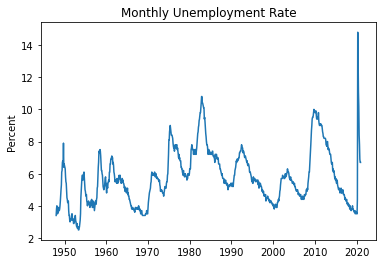

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(unemployment.data)
ax.set_ylabel(unemployment.units)
ax.set_title(unemployment.frequency+' '+unemployment.title)

## Methods

fredpy.series objects also have useful methods defined over them for manipulating and combining `fredpy.series` objects.  A full list of available methods is found here: https://www.briancjenkins.com/fredpy/docs/build/html/fredpy_examples.html#Methods.

As an example, let's compute and plot the quarterly (annualized) percentage change in real GDP for the US. First, we'll use fredpy to download nominal GDP and GDP deflator data (FRED has real GDP data, but I want to demonstrate ow to combine series).

In [10]:
deflator = fp.series('GDPDEF')
gdp = fp.series('GDP')

We want to divide GDP by the GDP deflator, but first we need to make sure that the date ranges for the respective series are the same, so we use the `fp.window_equalize()` function.

In [11]:
gdp, deflator = fp.window_equalize([gdp, deflator])

Next, use the `.divide()` and `.times()` methods to divide GDP by the deflator and multiply the result by 100.

In [12]:
real_gdp = gdp.divide(deflator).times(100)

Now, plot nominal and real GDP.

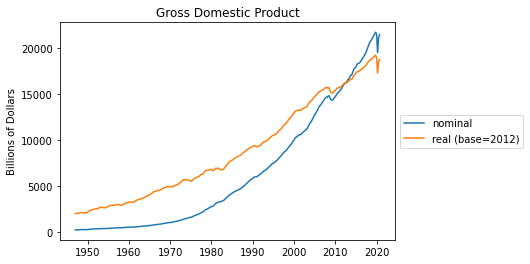

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,label='nominal')
ax.plot(real_gdp.data,label='real (base='+deflator.units[6:10]+')')
ax.set_ylabel(gdp.units)
ax.set_title(gdp.title)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Next, we can use the `.pc()` method to find the percent change in real GDP each quarter. Following convention, we'll multiply the result by 4 so that the units are in terms of *annualized* percentage change

In [14]:
real_gdp_growth = real_gdp.pc().times(4)

Plot the result.

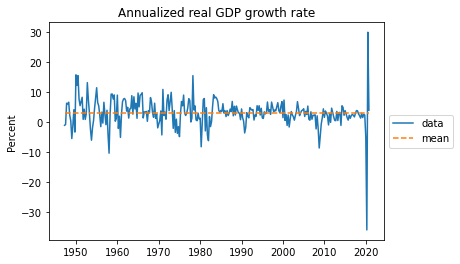

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(real_gdp_growth.data,label='data')
ax.plot(real_gdp_growth.data*0+real_gdp_growth.data.mean(),'--',label='mean')
ax.set_ylabel(real_gdp_growth.units)
ax.set_title('Annualized real GDP growth rate')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Constructing Data Sets

Perhaps you'd like to use fredpy to download several data series and load all of the series into a Pandas DataFrame. It's easy to do. Let's put the GDP, real GDP, and GDP deflator data into a DataFrame.

In [16]:
# Construct DataFrame
df = pd.DataFrame({
    'gdp':gdp.data,
    'real_gdp':real_gdp.data,
    'deflator':deflator.data
},index = gdp.data.index)

# Display first 5 rows
df.head()

,gdp,real_gdp,deflator
1947-01-01,243.164,2033.143813,11.960
1947-04-01,245.968,2027.598714,12.131
1947-07-01,249.585,2023.388731,12.335
1947-10-01,259.745,2055.107208,12.639
1948-01-01,265.742,2086.050710,12.739


Now, if you like, you can export the data to csv to import into another program or share with someone else.

In [17]:
# Export to csv
df.to_csv('gdp_data.csv')